
## The aim of this project is to cluster the data into different classes depending upon the price.

### Data Pre-processing
### Finding the optimal number of clusters using the elbow method
### Training the K-means algorithm on the training dataset
### Visualizing the clusters

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [48]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [22]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

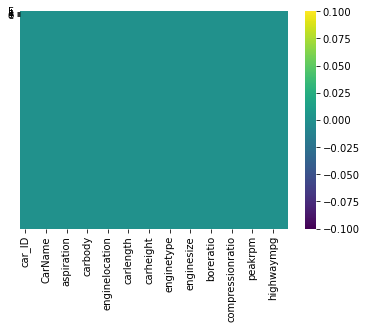

In [5]:
sns.heatmap(df.isnull(),yticklabels="False",cmap='viridis')

In [6]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [49]:
df['CarName']=df['CarName'].str.split('-| ').str[0]

In [50]:
replace_values = {'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
df=df.replace({'CarName':replace_values})

In [51]:
target_counts= df['CarName'].value_counts()

In [52]:
target_counts

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa           3
renault        2
mercury        1
Name: CarName, dtype: int64

<AxesSubplot:ylabel='CarName'>

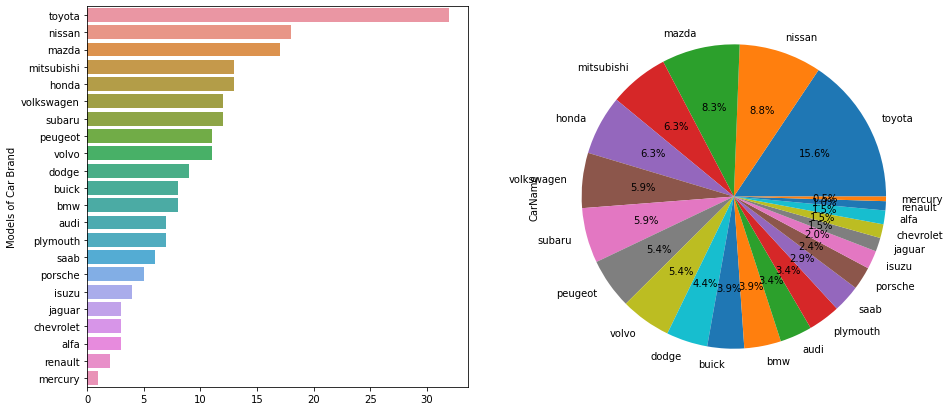

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(y = target_counts.index,x = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Models of Car Brand')
ax[0].set_facecolor('white')

target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1])

In [32]:
target_counts1= df['fueltype'].value_counts()

In [33]:
target_counts1

gas       185
diesel     20
Name: fueltype, dtype: int64

Text(0.5, 0.98, 'Fuel Type')

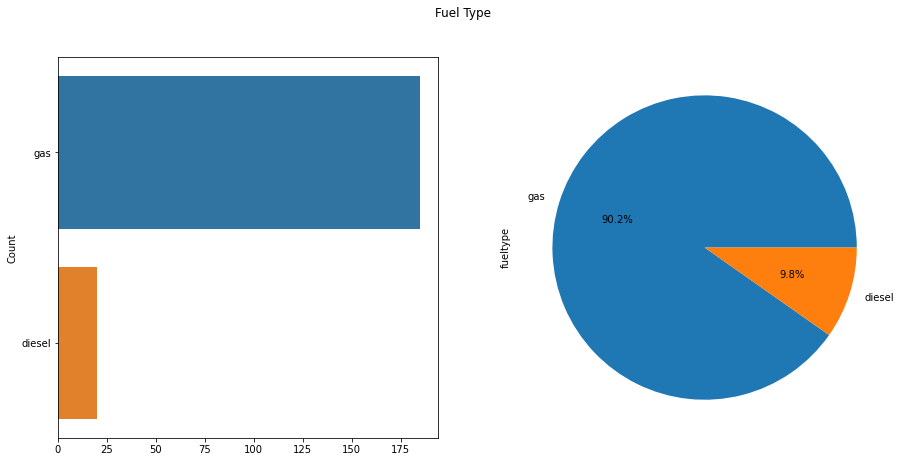

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts1_barplot = sns.barplot(y = target_counts1.index,x = target_counts1.values, ax = ax[0])
target_counts1_barplot.set_ylabel('Count')

target_counts1.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('Fuel Type')

In [38]:
target_counts2= df['aspiration'].value_counts()

In [39]:
target_counts2

std      168
turbo     37
Name: aspiration, dtype: int64

Text(0.5, 0.98, 'Aspiration')

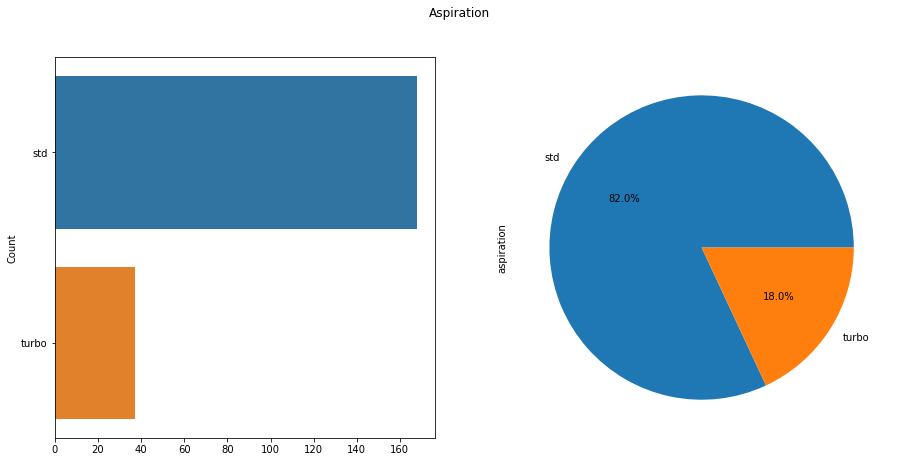

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts2_barplot = sns.barplot(y = target_counts2.index,x = target_counts2.values, ax = ax[0])
target_counts2_barplot.set_ylabel('Count')

target_counts2.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('Aspiration')

In [42]:
target_counts3= df['doornumber'].value_counts()

In [43]:
target_counts3

four    115
two      90
Name: doornumber, dtype: int64

Text(0.5, 0.98, 'doornumber')

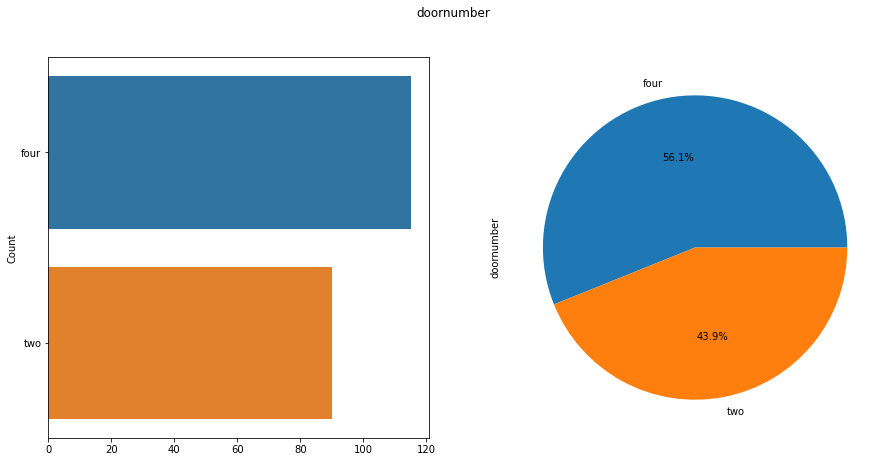

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts3_barplot = sns.barplot(y = target_counts3.index,x = target_counts3.values, ax = ax[0])
target_counts3_barplot.set_ylabel('Count')

target_counts3.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('doornumber')

In [45]:
target_counts4= df['carbody'].value_counts()

In [46]:
target_counts4

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0.5, 0.98, 'Body Type')

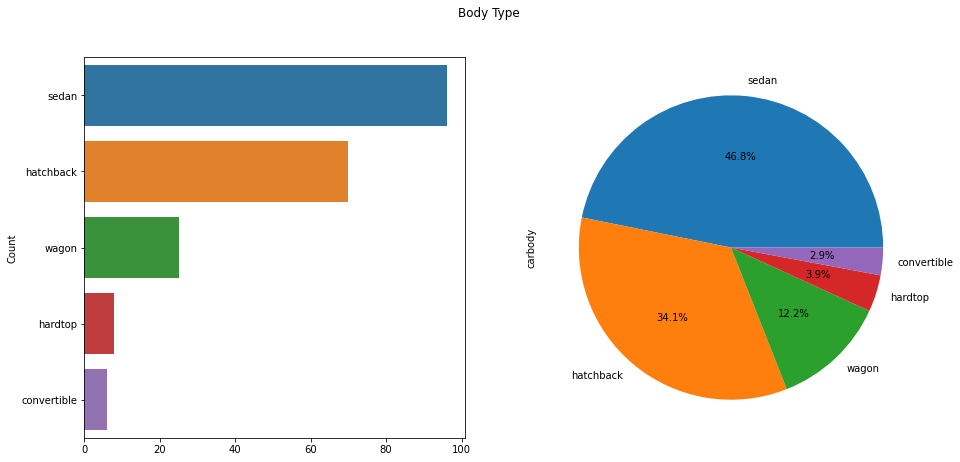

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts4_barplot = sns.barplot(y = target_counts4.index,x = target_counts4.values, ax = ax[0])
target_counts4_barplot.set_ylabel('Count')

target_counts4.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('Body Type')

In [12]:
target_counts5= df['drivewheel'].value_counts()

In [13]:
target_counts5

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Text(0.5, 0.98, 'drivewheel')

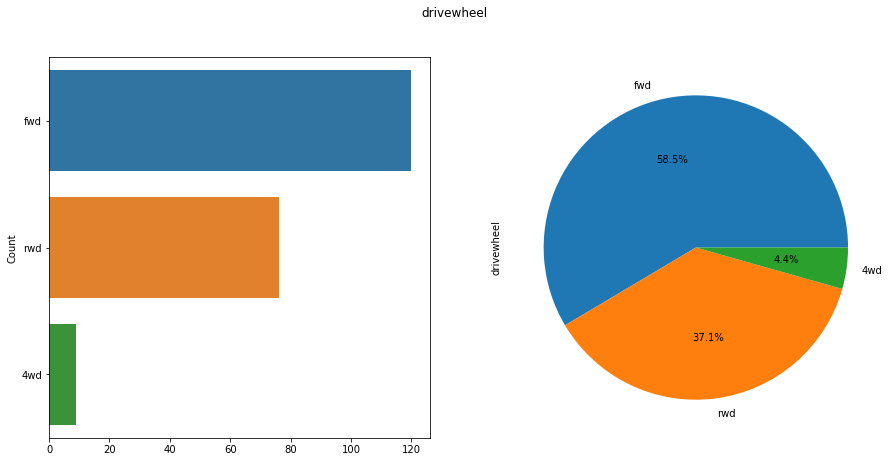

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts5_barplot = sns.barplot(y = target_counts5.index,x = target_counts5.values, ax = ax[0])
target_counts5_barplot.set_ylabel('Count')

target_counts5.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('drivewheel')

In [55]:
target_counts6= df['enginelocation'].value_counts()

In [56]:
target_counts6

front    202
rear       3
Name: enginelocation, dtype: int64

Text(0.5, 0.98, 'Engine location')

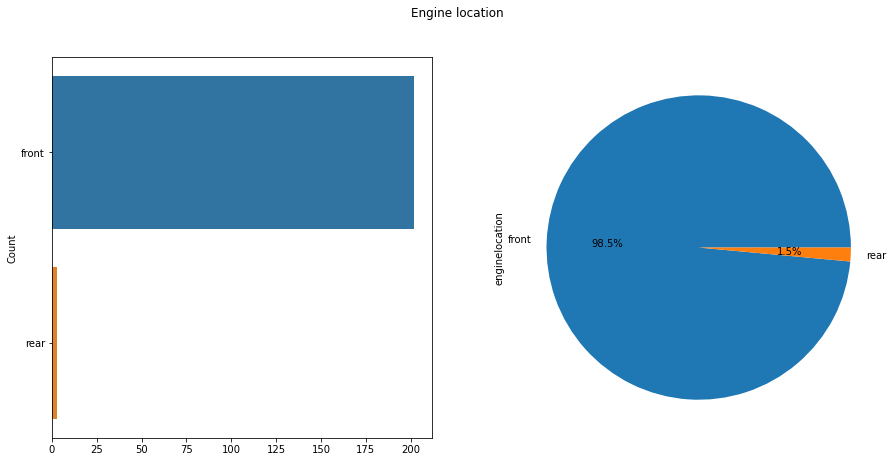

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts6_barplot = sns.barplot(y = target_counts6.index,x = target_counts6.values, ax = ax[0])
target_counts6_barplot.set_ylabel('Count')

target_counts6.plot.pie(autopct="%1.1f%%", ax=ax[1])
fig.suptitle('Engine location')

In [59]:
target_counts7= df['fuelsystem'].value_counts()

In [60]:
target_counts7

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

Text(0.5, 0.98, 'Fuel system')

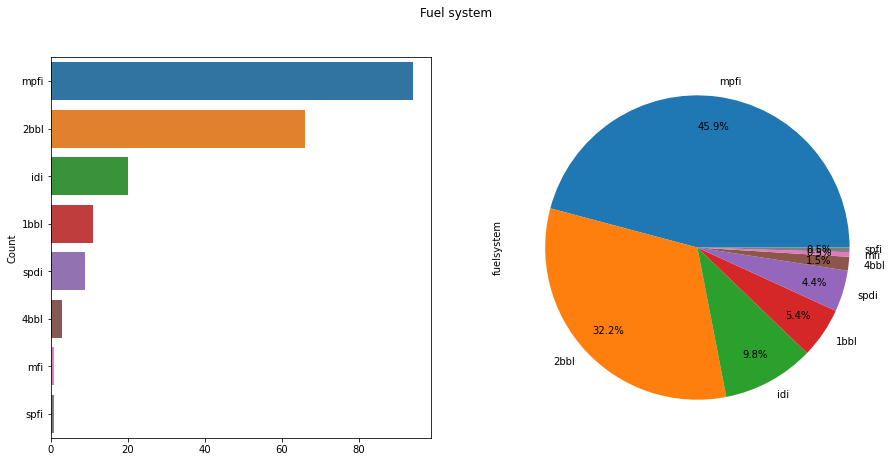

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts7_barplot = sns.barplot(y = target_counts7.index,x = target_counts7.values, ax = ax[0])
target_counts7_barplot.set_ylabel('Count')

target_counts7.plot.pie(autopct="%1.1f%%",pctdistance=0.8, ax=ax[1])
fig.suptitle('Fuel system')

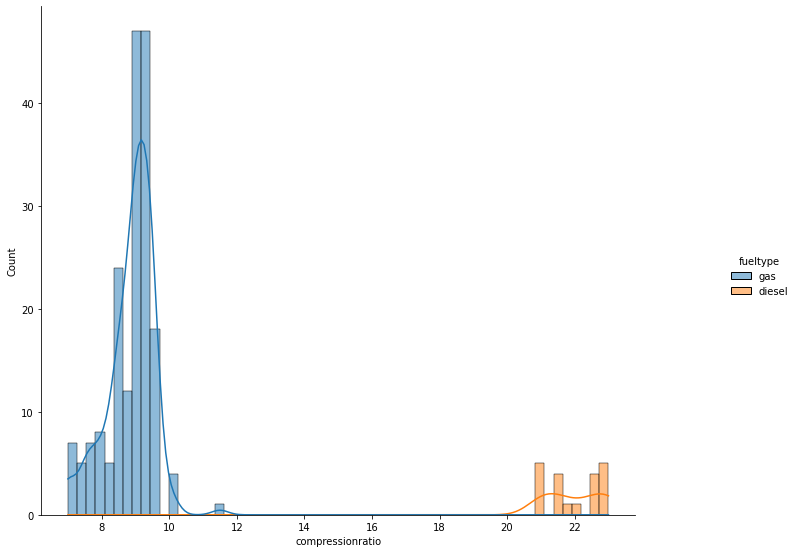

In [64]:
#Let us look at the distribution plot of compression ratio.

sns.displot(df, x="compressionratio", hue='fueltype',kde=True)
plt.gcf().set_size_inches(11.7, 8.27)


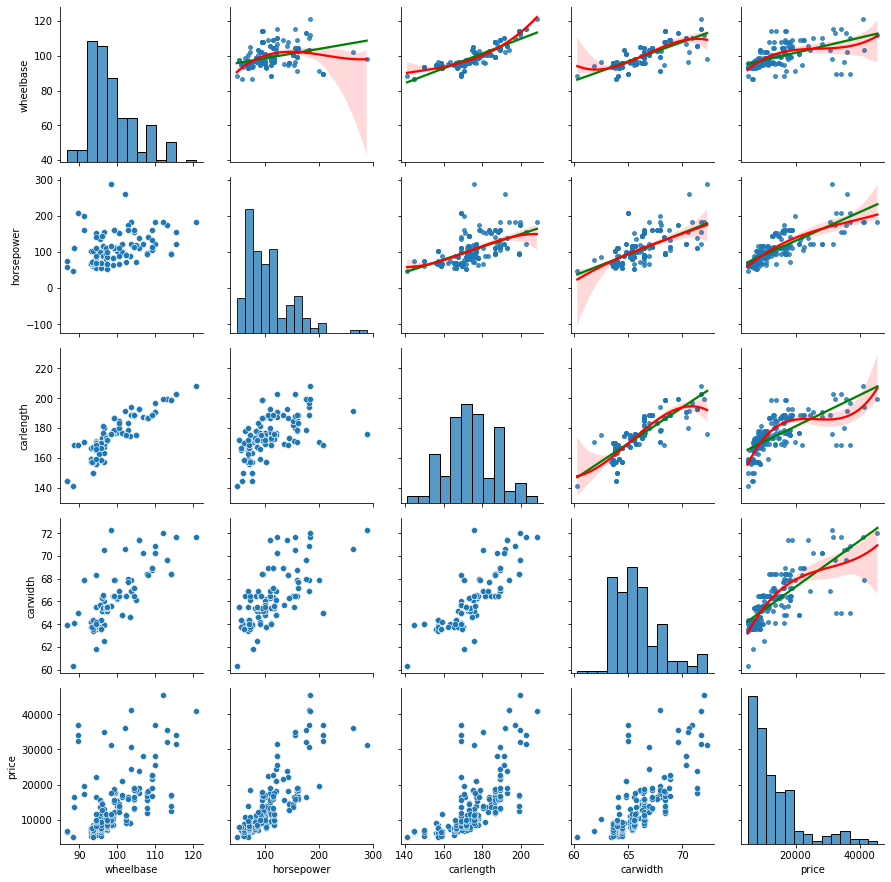

In [73]:
g=sns.PairGrid(data = df,vars = ['wheelbase','horsepower','carlength','carwidth','price'])
g.map_upper(sns.regplot,ci=None, scatter_kws={'s':15}, line_kws={"color": "green"})
g.map_upper(sns.regplot,ci=90,line_kws={"color": "red"},order=3,scatter=False)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

In [ ]:
#Now lets start with K-means algorithm.

#Before we go further let us perform OHE (one hot encoding) for categorical data and the scaling for numerical data.

#First lets drop the compression ratio column as this information can be obtained from fuel type column.

In [14]:
df_encode = pd.read_csv('CarPrice_Assignment.csv')

In [15]:
df_encode=df_encode.drop(columns=['car_ID'])

In [16]:
df_encode['CarName']=df_encode['CarName'].str.split('-| ').str[0]

In [32]:
replace_values = {'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
df_encode=df_encode.replace({'CarName':replace_values})

In [17]:
df_encode=df_encode.drop(columns=['compressionratio'])

In [18]:
df_encode['symboling'] = df_encode.symboling.astype('category')

In [19]:
df_encode['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: category
Categories (6, int64): [-2, -1, 0, 1, 2, 3]

In [20]:
df_encode['CarName'] = df_encode.CarName.astype('category')

In [21]:
df_encode['CarName']

0       alfa
1       alfa
2       alfa
3       audi
4       audi
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: CarName, Length: 205, dtype: category
Categories (28, object): ['Nissan', 'alfa', 'audi', 'bmw', ..., 'vokswagen', 'volkswagen', 'volvo', 'vw']

In [22]:
df_encode.dtypes

symboling         category
CarName           category
fueltype            object
aspiration          object
doornumber          object
carbody             object
drivewheel          object
enginelocation      object
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
fuelsystem          object
boreratio          float64
stroke             float64
horsepower           int64
peakrpm              int64
citympg              int64
highwaympg           int64
price              float64
dtype: object

In [27]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

for col in df_encode.columns:
    if df_encode[col].dtypes=='float64' or df_encode[col].dtypes=='int64':
        df_encode[col]=sc.fit_transform(df_encode[[col]])
df_encode.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,gas,std,two,convertible,rwd,front,0.058309,0.413433,...,four,0.260377,mpfi,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.207959
1,3,alfa,gas,std,two,convertible,rwd,front,0.058309,0.413433,...,four,0.260377,mpfi,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.282558
2,1,alfa,gas,std,two,hatchback,rwd,front,0.230321,0.449254,...,six,0.343396,mpfi,0.100000,0.666667,0.441667,0.346939,0.166667,0.263158,0.282558
3,2,audi,gas,std,four,sedan,fwd,front,0.384840,0.529851,...,four,0.181132,mpfi,0.464286,0.633333,0.225000,0.551020,0.305556,0.368421,0.219254
4,2,audi,gas,std,four,sedan,4wd,front,0.373178,0.529851,...,five,0.283019,mpfi,0.464286,0.633333,0.279167,0.551020,0.138889,0.157895,0.306142
5,2,audi,gas,std,two,sedan,fwd,front,0.384840,0.540299,...,five,0.283019,mpfi,0.464286,0.633333,0.258333,0.551020,0.166667,0.236842,0.251527
6,1,audi,gas,std,four,sedan,fwd,front,0.559767,0.770149,...,five,0.283019,mpfi,0.464286,0.633333,0.258333,0.551020,0.166667,0.236842,0.312596
7,1,audi,gas,std,four,wagon,fwd,front,0.559767,0.770149,...,five,0.283019,mpfi,0.464286,0.633333,0.258333,0.551020,0.166667,0.236842,0.342634
8,1,audi,gas,turbo,four,sedan,fwd,front,0.559767,0.770149,...,five,0.264151,mpfi,0.421429,0.633333,0.383333,0.551020,0.111111,0.105263,0.465642
9,0,audi,gas,turbo,two,hatchback,4wd,front,0.376093,0.553731,...,five,0.264151,mpfi,0.421429,0.633333,0.466667,0.551020,0.083333,0.157895,0.316299


In [ ]:
#Moreover, door number has the same catgorical information as number of cylinders.
#so lets add the string to the door column to avoid the confusion with naming the columns same in OHE.

In [28]:
df_encode['doornumber']=df_encode['doornumber'].map('door{}'.format)
df_encode.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,gas,std,doortwo,convertible,rwd,front,0.058309,0.413433,...,four,0.260377,mpfi,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.207959
1,3,alfa,gas,std,doortwo,convertible,rwd,front,0.058309,0.413433,...,four,0.260377,mpfi,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.282558
2,1,alfa,gas,std,doortwo,hatchback,rwd,front,0.230321,0.449254,...,six,0.343396,mpfi,0.100000,0.666667,0.441667,0.346939,0.166667,0.263158,0.282558
3,2,audi,gas,std,doorfour,sedan,fwd,front,0.384840,0.529851,...,four,0.181132,mpfi,0.464286,0.633333,0.225000,0.551020,0.305556,0.368421,0.219254
4,2,audi,gas,std,doorfour,sedan,4wd,front,0.373178,0.529851,...,five,0.283019,mpfi,0.464286,0.633333,0.279167,0.551020,0.138889,0.157895,0.306142


In [29]:
#Noe collecting all the column names with categorical data.

cat_cols=[]
for col in df_encode.columns:
    if df_encode[col].dtypes=='object':
        cat_cols.append(col)

In [30]:
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [ ]:
#Encoding the categorical data and droping one column to avoid the dummy trap variable.

In [31]:
df_encode = pd.get_dummies(data = df_encode, prefix = 'OHE', prefix_sep='_',
               columns = cat_cols,
               drop_first =True,
              dtype='int8')
df_encode.head(10)

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,OHE_three,OHE_twelve,OHE_two,OHE_2bbl,OHE_4bbl,OHE_idi,OHE_mfi,OHE_mpfi,OHE_spdi,OHE_spfi
0,3,alfa,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0,0,0,0,0,0,0,1,0,0
3,2,audi,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
5,2,audi,0.384840,0.540299,0.500000,0.441667,0.395268,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
6,1,audi,0.559767,0.770149,0.925000,0.658333,0.525989,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
7,1,audi,0.559767,0.770149,0.925000,0.658333,0.568658,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
8,1,audi,0.559767,0.770149,0.925000,0.675000,0.619860,0.264151,0.421429,0.633333,...,0,0,0,0,0,0,0,1,0,0
9,0,audi,0.376093,0.553731,0.633333,0.350000,0.607060,0.264151,0.421429,0.633333,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#Now we will collect the data required for applying the clusters.

X=df_encode.drop(columns=['price','CarName'])

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'K_values')

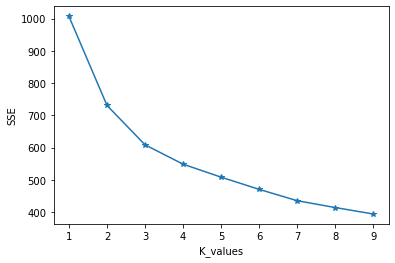

In [33]:
#We are dropping Car name and price, as we want to cluster depending upon this variables.
#Lets identify the optimum K value for K-means.

k_rng = range(1,10)

sse1 = []

for k1 in k_rng:
    km1 = KMeans(n_clusters = k1)
    km1.fit(X)
    sse1.append(km1.inertia_)
    
plt.plot(k_rng,sse1,marker='*')
plt.ylabel('SSE')
plt.xticks(k_rng)
plt.xlabel('K_values')

In [45]:
#Now we will consider '4' as the optimum K-Value for our analysis. We will classify the cluster names as 'Economy', 'Budget', 'Premium' and 'Luxury'. These can be set looking further into price and classify the cluster category to a particular cluster name.

#Performing our clustering 

km = KMeans(n_clusters = 4)
km.fit(X)
y_predict = km.predict(X)
df_encode['cluster_Number']=y_predict



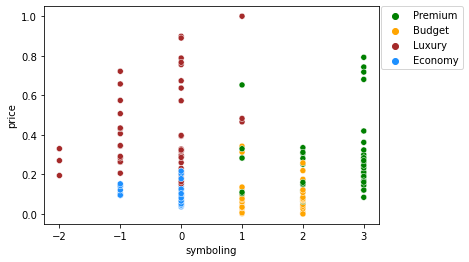

In [55]:
#We have added the cluster number to our data frame.
#By using the dictionary as shown below we will map these cluster values to new column. 

cluster_category = {0:'Budget',1:'Luxury',2:'Premium',3:'Economy'}

df_encode['cluster'] = df_encode['cluster_Number'].map(cluster_category)

#Now let us look at the results:

sns.scatterplot(data=df_encode, x = "symboling", y="price",hue="cluster",palette=['green','orange','brown','dodgerblue'])
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [ ]:
#We can look at the symboling data all the symbol '3' data are Premium cars. 
#High end cars with high prices belong to luxury cluster. The ones with low cost are classified into Premium and Budget.
#You can look into further categorical columns and it gives the similar information depending upon the clusters.